# Connecticut Housing Data Analysis and ML Preparation

### Load the Data

In [1]:
import time
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ct_housing = pd.read_csv('data/CT_Housing.csv')
ct_housing.head(10)

,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NonUseCode,Remarks,NumberOfBuildings
0,17001,2017,10/02/2017,Andover,27 HENDEE RD,58400.0,82000.0,0.712,NaN,Single Family,NaN,NaN,NaN
1,40043,2004,05/19/2005,Andover,BURNAP BRK RD,850.0,50000.0,1.700,Vacant Land,NaN,28,NaN,NaN
2,30070,2003,08/02/2004,Andover,ROUTE 6,157300.0,175000.0,89.880,Vacant Land,NaN,0,NaN,NaN
3,40036,2004,04/29/2005,Andover,ROUTE 6,22400.0,20000.0,112.000,Vacant Land,NaN,25,NaN,NaN
4,170003,2017,10/02/2017,Branford,22-24 SILVER ST,205500.0,357500.0,0.575,NaN,Two Family,NaN,NaN,NaN
5,50249,2005,07/05/2006,Ansonia,13 MCINTOSH LN,0.0,197400.0,0.000,Condo,NaN,7,NaN,NaN
6,50125,2005,02/16/2006,Ansonia,22 WESTFIELD AVE 5 &,331100.0,375000.0,88.300,Condo,NaN,0,NaN,NaN
7,170007,2017,10/02/2017,Groton,174 ANN AVE,158410.0,192000.0,0.825,NaN,Single Family,NaN,NaN,NaN
8,50059,2005,05/17/2006,Ashford,52 PERRY HL RD,1196070.0,3700000.0,32.300,Apartments,NaN,0,NaN,NaN
9,140042,2014,07/22/2015,Ashford,ASHFORD LAKE DR,3900.0,2500.0,1.560,Vacant Land,NaN,NaN,NaN,NaN


View all the columns in the CT housing data.  Begin to see which columns hold numerical data and categorical
data.  Also check to see which cells contain nulls.  These must be filled while cleaning the data.

In [3]:
ct_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912302 entries, 0 to 912301
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SerialNumber       912302 non-null  int64  
 1   ListYear           912302 non-null  int64  
 2   DateRecorded       912294 non-null  object 
 3   Town               912302 non-null  object 
 4   Address            912251 non-null  object 
 5   AssessedValue      911998 non-null  float64
 6   SaleAmount         881510 non-null  float64
 7   SalesRatio         911469 non-null  float64
 8   PropertyType       812319 non-null  object 
 9   ResidentialType    699105 non-null  object 
 10  NonUseCode         538939 non-null  object 
 11  Remarks            132036 non-null  object 
 12  NumberOfBuildings  50705 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 90.5+ MB


### Chart the Data

<AxesSubplot:>

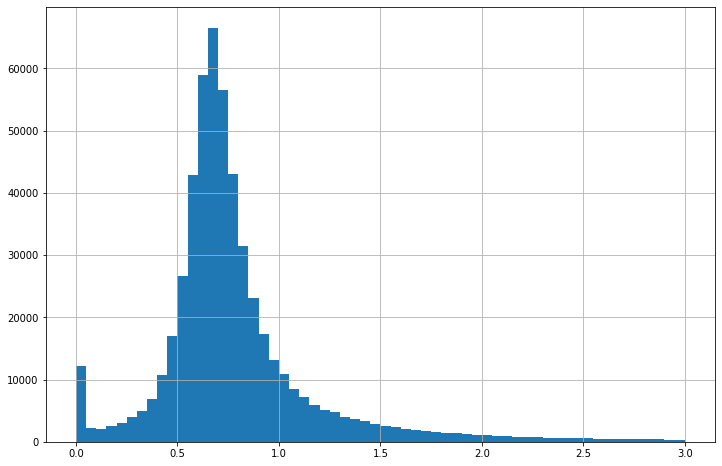

In [4]:
ct_housing['SalesRatio'].hist(bins=60, figsize=(12, 8), range=(0, 3))

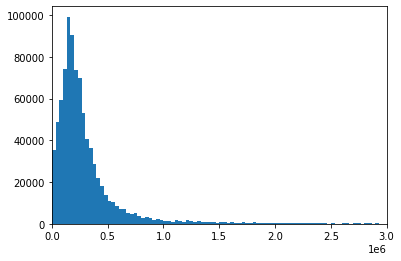

In [5]:
plt.hist(ct_housing['SaleAmount'][ct_housing['SaleAmount'] < 3_000_000], bins=90)
plt.xlim(0, 3_000_000)
plt.show()

### Analyze the categorical columns

In [6]:
ct_housing['PropertyType'].unique()

array([nan, 'Vacant Land', 'Condo', 'Apartments', 'Commercial',
       'Residential', 'Industrial', '10 Mill Forest', 'Public Utility'],
      dtype=object)

In [7]:
ct_housing['PropertyType'].astype('category').value_counts()

Residential       602891
Condo             120528
Vacant Land        46356
Commercial         32262
Apartments          5949
Industrial          4181
Public Utility       141
10 Mill Forest        11
Name: PropertyType, dtype: int64

In [8]:
ct_housing['ResidentialType'].unique()

array(['Single Family', nan, 'Two Family', 'Condo Family', 'Vacant Land',
       'Commercial', 'Industrial', 'Four Family', 'Three Family',
       'Apartments', 'Residential', 'Multi Family', 'Public Utility'],
      dtype=object)

In [9]:
ct_housing['ResidentialType'].astype('category').value_counts()

Single Family     614927
Two Family         39037
Three Family       19453
Condo Family       16180
Vacant Land         3555
Commercial          3297
Four Family         1332
Apartments           543
Industrial           404
Residential          292
Multi Family          76
Public Utility         9
Name: ResidentialType, dtype: int64

In [10]:
ct_housing['NumberOfBuildings'].unique()

array([nan,  1.,  0.,  2., 18.,  3., 36., 11.,  8., 25.,  4.,  6., 52.,
       12., 69., 30., 28.,  5.,  7., 14., 19., 10., 17.])

In [11]:
ct_housing['NumberOfBuildings'].astype('category').value_counts()

1.0     37653
0.0     12620
2.0       311
3.0        56
4.0        17
11.0       11
5.0         8
6.0         7
14.0        3
8.0         3
25.0        3
7.0         2
36.0        2
19.0        1
18.0        1
17.0        1
12.0        1
52.0        1
10.0        1
28.0        1
30.0        1
69.0        1
Name: NumberOfBuildings, dtype: int64

In [12]:
ct_housing['Remarks'].astype('category').value_counts().head(10)

addl remarks                   41666
0                              30671
ESTATE SALE                     2154
FALSE                           1682
SHORT SALE                      1198
SALE OF FORECLOSED PROPERTY      814
SALES RATIO                      757
NEW CONSTRUCTION                 756
qualified sale                   717
BELOW MARKET                     662
Name: Remarks, dtype: int64

In [13]:
ct_housing['Town'].astype('category').value_counts().head(20)

Bridgeport       34486
Stamford         29462
Waterbury        24275
Norwalk          21474
New Haven        20463
West Hartford    18322
Hartford         17705
Danbury          17460
Milford          16407
Meriden          16273
Hamden           16246
Stratford        16187
Greenwich        15712
Fairfield        15702
Manchester       15207
Bristol          14362
New Britain      14042
Torrington       12906
East Hartford    12773
West Haven       12308
Name: Town, dtype: int64

In [14]:
ct_housing['NonUseCode'].astype('category').value_counts()

0                   290381
7                    33301
25                   32516
14                   29818
14 - Foreclosure     18129
                     ...  
68                       1
20 - Cemetery            1
88                       1
74                       1
75                       1
Name: NonUseCode, Length: 84, dtype: int64

### Split the Data into Test and Training Sets

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ct_housing, test_size=0.2, random_state=42)

### Clean the Data

First remove rows with null values in required columns.

In [16]:
ct_housing_full_data = train_set.drop(['Remarks', 'Address', 'SerialNumber', 'NonUseCode'], axis=1)
ct_housing_full_data = ct_housing_full_data[~ct_housing_full_data['DateRecorded'].isnull()]
ct_housing_full_data = ct_housing_full_data[~ct_housing_full_data['AssessedValue'].isnull()]
ct_housing_full_data = ct_housing_full_data[~ct_housing_full_data['SaleAmount'].isnull()]
ct_housing_full_data = ct_housing_full_data[~ct_housing_full_data['SalesRatio'].isnull()]

def convert_to_unix(x: str) -> int:
    ts = datetime.strptime(x, "%m/%d/%Y")
    return int(time.mktime(ts.timetuple()))

ct_housing_full_data['DateRecorded'] = ct_housing_full_data['DateRecorded'].apply(convert_to_unix)
ct_housing_full_data

,ListYear,DateRecorded,Town,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType,NumberOfBuildings
748291,2015,1474516800,Naugatuck,121440.0,159900.0,0.759475,Residential,Single Family,NaN
831909,2012,1350014400,Guilford,46490.0,56000.0,0.830179,Commercial,NaN,NaN
185198,2016,1478059200,Newtown,96880.0,80000.0,1.211000,Residential,Single Family,NaN
183055,2003,1087358400,New Milford,106960.0,220000.0,48.610000,Commercial,NaN,NaN
407872,2016,1494216000,Norwalk,881040.0,962500.0,0.915366,Residential,Single Family,NaN
...,...,...,...,...,...,...,...,...,...
259178,2005,1148356800,West Hartford,88980.0,297000.0,30.000000,Residential,Two Family,NaN
365838,2009,1267419600,East Hartford,119420.0,131500.0,0.908137,Residential,Single Family,NaN
131932,2006,1187841600,Hamden,5670.0,60000.0,0.094500,Vacant Land,NaN,NaN
671155,2012,1360213200,Newington,83800.0,115000.0,0.728696,Commercial,NaN,NaN


In [17]:
ct_housing_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704417 entries, 748291 to 121958
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ListYear           704417 non-null  int64  
 1   DateRecorded       704417 non-null  int64  
 2   Town               704417 non-null  object 
 3   AssessedValue      704417 non-null  float64
 4   SaleAmount         704417 non-null  float64
 5   SalesRatio         704417 non-null  float64
 6   PropertyType       624715 non-null  object 
 7   ResidentialType    541463 non-null  object 
 8   NumberOfBuildings  40456 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 53.7+ MB


In [18]:
housing_data_labels = ct_housing_full_data['SaleAmount'].copy()
housing_data_labels

748291     159900.0
831909      56000.0
185198      80000.0
183055     220000.0
407872     962500.0
            ...    
259178     297000.0
365838     131500.0
131932      60000.0
671155     115000.0
121958    6200000.0
Name: SaleAmount, Length: 704417, dtype: float64

In [19]:
housing_data = ct_housing_full_data.drop('SaleAmount', axis=1)
housing_data

,ListYear,DateRecorded,Town,AssessedValue,SalesRatio,PropertyType,ResidentialType,NumberOfBuildings
748291,2015,1474516800,Naugatuck,121440.0,0.759475,Residential,Single Family,NaN
831909,2012,1350014400,Guilford,46490.0,0.830179,Commercial,NaN,NaN
185198,2016,1478059200,Newtown,96880.0,1.211000,Residential,Single Family,NaN
183055,2003,1087358400,New Milford,106960.0,48.610000,Commercial,NaN,NaN
407872,2016,1494216000,Norwalk,881040.0,0.915366,Residential,Single Family,NaN
...,...,...,...,...,...,...,...,...
259178,2005,1148356800,West Hartford,88980.0,30.000000,Residential,Two Family,NaN
365838,2009,1267419600,East Hartford,119420.0,0.908137,Residential,Single Family,NaN
131932,2006,1187841600,Hamden,5670.0,0.094500,Vacant Land,NaN,NaN
671155,2012,1360213200,Newington,83800.0,0.728696,Commercial,NaN,NaN


Next, use scikit-learn's `Pipeline` and `ColumnTransformer` classes to clean the data.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['ListYear', 'DateRecorded', 'AssessedValue', 'SalesRatio', 'NumberOfBuildings']),
    ('cat', cat_pipeline, ['Town', 'PropertyType', 'ResidentialType'])
])

In [21]:
ct_housing_prepared = full_pipeline.fit_transform(housing_data)
ct_housing_prepared

<704417x196 sparse matrix of type '<class 'numpy.float64'>'
	with 5635336 stored elements in Compressed Sparse Row format>

In [33]:
ct_housing_prepared.toarray()

array([[ 1.15827806,  1.23654411, -0.10575518, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62201083,  0.53331529, -0.1618756 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.33703381,  1.2565527 , -0.12414501, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.45052365, -0.38268783, -0.19244046, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62201083,  0.59092133, -0.13393894, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.80076657,  0.71290461,  1.88844789, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
ct_housing_prepared.toarray()[0]

array([ 1.15827806,  1.23654411, -0.10575518, -0.00519822,  0.0689244 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

### Training the ML Algorithm

Train the data using a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 
model (`LinearRegression`).

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(ct_housing_prepared, housing_data_labels)

LinearRegression()

In [40]:
housing_data[:5]

,ListYear,DateRecorded,Town,AssessedValue,SalesRatio,PropertyType,ResidentialType,NumberOfBuildings
748291,2015,1474516800,Naugatuck,121440.0,0.759475,Residential,Single Family,NaN
831909,2012,1350014400,Guilford,46490.0,0.830179,Commercial,NaN,NaN
185198,2016,1478059200,Newtown,96880.0,1.211000,Residential,Single Family,NaN
183055,2003,1087358400,New Milford,106960.0,48.610000,Commercial,NaN,NaN
407872,2016,1494216000,Norwalk,881040.0,0.915366,Residential,Single Family,NaN


In [37]:
predictions = lin_reg.predict(prepared_data_subset)

f"Predictions: {predictions[:5]}"

'Predictions: [188683.2068982  523073.33682687 380293.06206749 444395.59811064\n 710566.6714288 ]'

In [39]:
f"Labels: {list(housing_data_labels)[:5]}"

'Labels: [159900.0, 56000.0, 80000.0, 220000.0, 962500.0]'

The results show that this model is terrible at predicting housing prices in Connecticut.  However, it was
still worthwhile to walk through the steps needed to prepare data for a machine learning algorithm.

In [41]:
from sklearn.metrics import mean_squared_error

lin_reg_mse = mean_squared_error(housing_data_labels, predictions)
lin_reg_mse

3915579061338.6265

In [42]:
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

1978782.2167531794

Train the data using a [decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor) 
model (`DecisionTreeRegressor`).

In [45]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(ct_housing_prepared, housing_data_labels)

DecisionTreeRegressor()

In [46]:
predictions = decision_tree_reg.predict(prepared_data_subset)

f"Predictions: {predictions[:5]}"

'Predictions: [159900.  56000.  80000. 220000. 962500.]'

In [47]:
f"Labels: {list(housing_data_labels)[:5]}"

'Labels: [159900.0, 56000.0, 80000.0, 220000.0, 962500.0]'

The results show that the model is likely overfitted to the data, as only **1108** records of **704416** have 
different predicted values different than the labels.

In [54]:
labels_and_predictions = pd.DataFrame({
    'labels': list(housing_data_labels),
    'predictions': predictions
})
labels_and_predictions

,labels,predictions
0,159900.0,159900.0
1,56000.0,56000.0
2,80000.0,80000.0
3,220000.0,220000.0
4,962500.0,962500.0
...,...,...
704412,297000.0,297000.0
704413,131500.0,131500.0
704414,60000.0,60000.0
704415,115000.0,115000.0


In [55]:
labels_and_predictions[labels_and_predictions['labels'] != labels_and_predictions['predictions']]

,labels,predictions
361,236000.0,1.730667e+05
1029,151575.0,1.499500e+05
1465,67000.0,6.710000e+04
2150,3328000.0,5.518732e+06
2216,450000.0,3.000000e+05
...,...,...
701728,114900.0,1.029288e+05
702587,227125.0,2.283400e+05
702611,548500.0,5.442500e+05
702639,98500.0,1.370500e+05


In [56]:
largest_diff_index = (labels_and_predictions['labels'] - labels_and_predictions['predictions']).abs().idxmax()
labels_and_predictions.iloc[largest_diff_index]

labels            940000.0
predictions    470940000.0
Name: 485767, dtype: float64

In [48]:
decision_tree_reg_mse = mean_squared_error(housing_data_labels, predictions)
decision_tree_reg_mse

631902839266.5392

In [49]:
decision_tree_reg_rmse = np.sqrt(decision_tree_reg_mse)
decision_tree_reg_rmse

794923.1656371194